# World Data League 2021
## Notebook Template

This notebook is one of the mandatory deliverables when you submit your solution (alongside the video pitch). Its structure follows the WDL evaluation criteria and it has dedicated cells where you can add descriptions. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work.

The notebook must:

*   💻 have all the code that you want the jury to evaluate
*   🧱 follow the predefined structure
*   📄 have markdown descriptions where you find necessary
*   👀 be saved with all the output that you want the jury to see
*   🏃‍♂️ be runnable


## External links and resources
Paste here all the links to external resources that are necessary to understand and run your code. Add descriptions to make it clear how to use them during evaluation.

https://www.kdnuggets.com/2017/10/7-techniques-visualize-geospatial-data.html

https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/


https://towardsdatascience.com/visualizing-spatial-data-with-geojson-heatmaps-1fbe2063ab86

https://www.openstreetmap.org/search?query=portugal#map=6/36.234/-18.873

https://colab.research.google.com/github/shakasom/GDS/blob/master/Part1%20-%20Introduction.ipynb

## Introduction
Describe how you framed the challenge by telling us what problem are you trying to solve and how your solution solves that problem.

## Development
Start coding here! 👩‍💻

Don't hesitate to create markdown cells to include descriptions of your work where you see fit, as well as commenting your code.

We know that you know exactly where to start when it comes to crunching data and building models, but don't forget that WDL is all about social impact...so take that into consideration as well.

### Installing the libraries required

In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 2s (925 kB/s)
Selecting previously unselected p

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px

In [ ]:
!git clone --recursive https://github.com/Pravallika-Myneni/WDL-stage-2.git

Cloning into 'WDL-stage-2'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 43 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (43/43), done.


In [ ]:
!ls WDL-stage-2/datasets/

data.md  Lisbon.geojson  m_risk_prfile.zip  porto.geojson


In [ ]:
!unzip WDL-stage-2/datasets/m_risk_prfile.zip

Archive:  WDL-stage-2/datasets/m_risk_prfile.zip
 extracting: m_risk_prfile.cpg       
  inflating: m_risk_prfile.dbf       
  inflating: m_risk_prfile.geojson   
  inflating: m_risk_prfile.prj       
  inflating: m_risk_prfile.shp       
  inflating: m_risk_prfile.shx       


In [ ]:
geo_json_data = gpd.read_file('m_risk_prfile.geojson')
geo_json_data.columns

Index(['Link_ID', 'linkid', 'Daily_Aver', 'Average_Ve', 'Median_of_',
       'First_Quar', 'Third_Quar', 'Func_Class', 'Speed_Cat', 'geometry'],
      dtype='object')

In [ ]:
dbf_data = gpd.read_file('m_risk_prfile.dbf')
dbf_data.columns

Index(['Link_ID', 'linkid', 'Daily_Aver', 'Average_Ve', 'Median_of_',
       'First_Quar', 'Third_Quar', 'Func_Class', 'Speed_Cat', 'geometry'],
      dtype='object')

In [ ]:
shp_data = gpd.read_file('m_risk_prfile.shp')
shp_data.columns

Index(['Link_ID', 'linkid', 'Daily_Aver', 'Average_Ve', 'Median_of_',
       'First_Quar', 'Third_Quar', 'Func_Class', 'Speed_Cat', 'geometry'],
      dtype='object')

In [ ]:
shx_data = gpd.read_file('m_risk_prfile.shx')
shx_data.columns

Index(['Link_ID', 'linkid', 'Daily_Aver', 'Average_Ve', 'Median_of_',
       'First_Quar', 'Third_Quar', 'Func_Class', 'Speed_Cat', 'geometry'],
      dtype='object')

In [ ]:
#prj_data = gpd.read_file('m_risk_prfile.prj')
#prj_data.columns
#for containing information related to a coordinate system.

In [ ]:
#cpg_data = gpd.read_file('m_risk_prfile.cpg')
#cpg_json_data.columns
#describes a set of characters for displaying text in shapefiles; helps localize maps for specific languages.

In [ ]:
geo_json_data.shape

(34678, 10)

In [ ]:
type(geo_json_data)

geopandas.geodataframe.GeoDataFrame

In [ ]:
geo_json_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34678 entries, 0 to 34677
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Link_ID     34678 non-null  int64   
 1   linkid      34678 non-null  int64   
 2   Daily_Aver  34678 non-null  float64 
 3   Average_Ve  34678 non-null  float64 
 4   Median_of_  34678 non-null  float64 
 5   First_Quar  34678 non-null  float64 
 6   Third_Quar  34678 non-null  float64 
 7   Func_Class  34678 non-null  int64   
 8   Speed_Cat   34678 non-null  int64   
 9   geometry    34678 non-null  geometry
dtypes: float64(5), geometry(1), int64(4)
memory usage: 2.6 MB


In [ ]:
geo_json_data.describe()

,Link_ID,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat
count,3.467800e+04,3.467800e+04,34678.000000,34678.000000,34678.000000,34678.000000,34678.000000,34678.000000,34678.000000
mean,8.958206e+08,8.958206e+08,3340.417942,56.816834,56.463409,43.822041,68.091844,2.684613,4.904781
std,2.355910e+08,2.355910e+08,2725.873982,51.983670,26.240876,24.442204,30.985191,0.538658,1.520568
min,8.021682e+07,8.021682e+07,14.435864,-401.703724,1.000000,-392.500000,1.000000,1.000000,2.000000
25%,7.364832e+08,7.364832e+08,1903.398108,38.315321,38.250000,26.000000,48.000000,2.000000,4.000000
50%,9.067377e+08,9.067377e+08,2644.529317,49.966126,50.000000,38.875000,60.333333,3.000000,6.000000
75%,1.154997e+09,1.154997e+09,3897.886608,69.511585,71.000000,56.000000,85.000000,3.000000,6.000000
max,1.223731e+09,1.223731e+09,49309.806935,6357.022296,1326.250000,143.000000,2605.000000,3.000000,7.000000


In [ ]:
geo_json_data.sample(4)

,Link_ID,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat,geometry
30558,1168218966,1168218966,1749.133695,57.177273,63.666667,41.0,70.500000,3,6,"MULTILINESTRING ((-8.62430 41.24151, -8.62471 ..."
1108,537295339,537295339,2100.603447,29.759065,30.000000,19.0,39.000000,3,6,"MULTILINESTRING ((-9.23064 38.76721, -9.23058 ..."
8102,875129688,875129688,1194.116361,74.625000,69.500000,64.5,88.000000,2,4,"MULTILINESTRING ((-8.65380 38.73653, -8.65392 ..."
20811,591375793,591375793,4341.528552,61.873533,57.714286,54.0,57.714286,3,6,"MULTILINESTRING ((-8.53483 40.95759, -8.53510 ..."


In [ ]:
len(set(geo_json_data['linkid']))

34678

<Figure size 1080x1080 with 0 Axes>

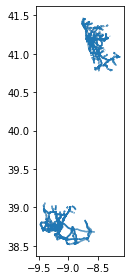

In [ ]:
# Plot overlayed maps
plt.figure(figsize= (15,15))
geo_json_data.plot(markersize=0.5)
plt.tight_layout()
#plt.savefig('overlay_map.png')
plt.show()

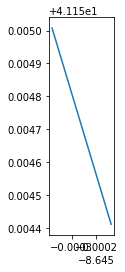

In [ ]:
geo_json_data.sample(1).plot(markersize=0.5)

In [ ]:
porto_boundaries = gpd.read_file('https://raw.githubusercontent.com/Pravallika-Myneni/WDL-stage-2/main/datasets/porto.geojson')
lisbon_boundaries = gpd.read_file('https://raw.githubusercontent.com/Pravallika-Myneni/WDL-stage-2/main/datasets/Lisbon.geojson')

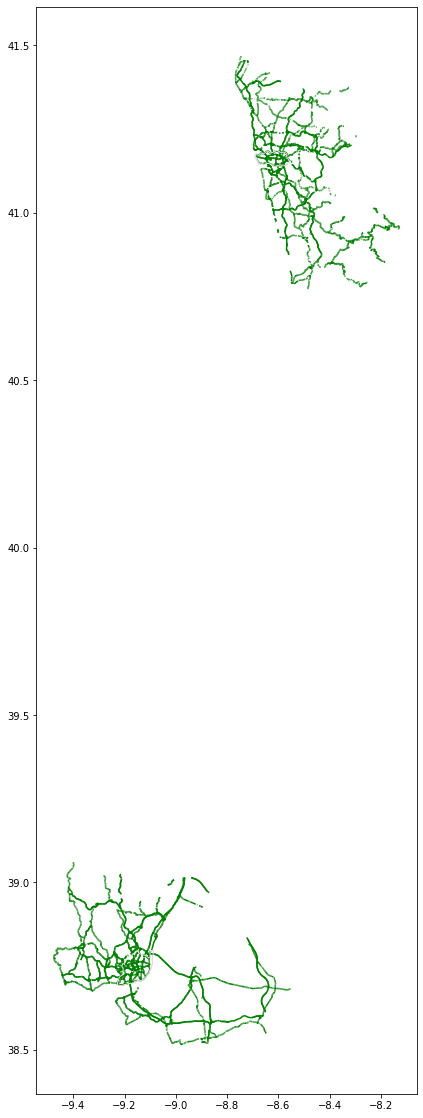

In [ ]:
ax = porto_boundaries.plot(figsize=(20,20), color='none', edgecolor='gainsboro', zorder=3)
lisbon_boundaries.plot(figsize=(20,20), color='none', edgecolor='gainsboro', zorder=3,ax=ax)
geo_json_data.plot(color = 'green', ax = ax)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Coordinate systems and Projections
Coordinate reference systems represent how our data as two dimensional (planar) relates to actual places on earth. It is the glue that holds the attributes to their respective locations. Geodataframes has .crs attribute that can give you the original CRS used in the data. It is easy to transform and project these coordinates. However, to perform projections, it is necessary to have the same CRS in order to carry out geographic analysis and get the right values out the analysis. The countries, cities and rivers have the same CRS. Let us check them.

In [ ]:
geo_json_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Different CRS have different measurements. For some, the coordinates are defined in decimal degrees while others are defined in meters. It is common process to reproject data from one format to another in Geographic data processing. This source is very useful in visualizing and comparing different Projections: https://map-projections.net/compare.php?p1=mercator-84&p2=robinson&sps=1

We will project our data into mercator. The Mercator projection, latitude-longitude quadrangles are stretched along the x-axis and y-axis as you move away from the equator.

In [ ]:
# Look at the geometry column: decimal degrees
geo_json_data.geometry[:5]

In [ ]:
# Project the data into Mercator Projection epsg=3395
data_projected = geo_json_data.to_crs({'init' : 'espg:3395'})

#See the geometry column of the projected data
data_projected.geometry[:5]

In [ ]:
plot both

#From Start

##Preprocessing datasets

In [ ]:
geo_json_data.isnull().sum()

Link_ID       0
linkid        0
Daily_Aver    0
Average_Ve    0
Median_of_    0
First_Quar    0
Third_Quar    0
Func_Class    0
Speed_Cat     0
geometry      0
dtype: int64

In [ ]:
geo_json_data.dtypes

Link_ID          int64
linkid           int64
Daily_Aver     float64
Average_Ve     float64
Median_of_     float64
First_Quar     float64
Third_Quar     float64
Func_Class       int64
Speed_Cat        int64
geometry      geometry
dtype: object

In [ ]:
geo_json_data.shape

(34678, 10)

In [ ]:
len(geo_json_data['geometry'].unique())

34673

In [ ]:
len(geo_json_data['linkid'].unique())

34678

In [ ]:
len(geo_json_data['linkid'] == geo_json_data['Link_ID'])

34678

In [ ]:
geo_json_data = geo_json_data.drop(columns= ['Link_ID'])

In [ ]:
len(set(geo_json_data['Speed_Cat']))

6

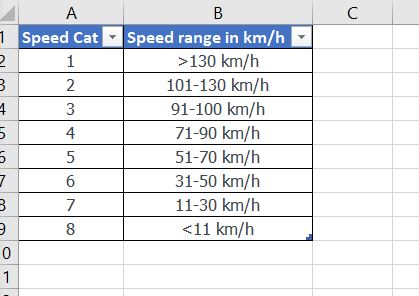

In [ ]:
len(geo_json_data['Func_Class'].unique())

3

In [ ]:
Geo_data = geo_json_data[['linkid','geometry']]
Geo_data.head()

,linkid,geometry
0,80216819,"MULTILINESTRING ((-9.16402 38.77030, -9.16389 ..."
1,80216858,"MULTILINESTRING ((-9.16645 38.74274, -9.16638 ..."
2,80216859,"MULTILINESTRING ((-9.16645 38.74274, -9.16637 ..."
3,80216860,"MULTILINESTRING ((-9.16588 38.74370, -9.16568 ..."
4,80216867,"MULTILINESTRING ((-9.16472 38.74478, -9.16487 ..."


In [ ]:
road_data = geo_json_data.drop(columns= ['geometry'])
road_data.head()

,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat
0,80216819,6224.778569,45.208716,44.464286,28.000000,59.00,2,6
1,80216858,2236.054168,79.563308,82.750000,71.750000,93.25,2,4
2,80216859,2138.725039,65.955069,67.333333,61.000000,75.00,3,6
3,80216860,2201.335041,47.533911,44.000000,26.900000,74.00,3,6
4,80216867,2102.610278,51.375291,53.250000,45.333333,59.00,3,6


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
X = road_data.drop(columns= ['linkid'])

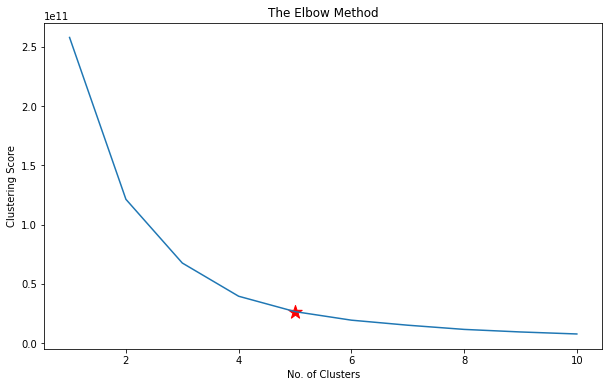

In [ ]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [ ]:
kmeans= KMeans(n_clusters = 5, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

In [ ]:
road_data['cluster'] = pd.DataFrame(pred, columns=['cluster'])
road_data.sample(5)

,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat,cluster
6053,810245749,2064.533642,53.153922,43.000000,29.0,66.000000,2,6,4
30392,1167467571,2998.231196,56.678571,57.142857,44.0,72.285714,3,6,0
14806,1179831415,340.272478,80.000000,80.000000,41.0,119.000000,3,6,4
32434,1218234637,1908.587769,50.882353,51.000000,46.0,57.000000,3,6,4
11381,916000220,1605.362981,43.655964,43.500000,38.4,49.666667,3,5,4


In [ ]:
cluster_0 = road_data[road_data['cluster']==0].copy()
cluster_1 = road_data[road_data['cluster']==1].copy()
cluster_2 = road_data[road_data['cluster']==2].copy()
cluster_3 = road_data[road_data['cluster']==3].copy()
cluster_4 = road_data[road_data['cluster']==4].copy()



In [ ]:
cluster_0.describe()

,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat,cluster
count,1.106400e+04,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.0
mean,9.097398e+08,3820.669071,57.875017,57.506132,44.027853,69.762411,2.627892,4.765907,0.0
std,2.428032e+08,665.070185,65.863498,25.465938,25.060173,27.207569,0.587698,1.598542,0.0
min,8.021708e+07,2885.356488,-38.986610,8.000000,0.000000,9.000000,1.000000,2.000000,0.0
25%,7.374331e+08,3246.641928,38.263267,38.333333,25.000000,49.000000,2.000000,4.000000,0.0
50%,9.072881e+08,3706.870529,50.769833,51.000000,38.000000,62.000000,3.000000,6.000000,0.0
75%,1.166900e+09,4309.585340,71.555033,74.000000,57.654167,89.000000,3.000000,6.000000,0.0
max,1.223327e+09,5341.442997,6357.022296,131.000000,119.000000,456.000000,3.000000,7.000000,0.0


In [ ]:
cluster_1.describe()

,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat,cluster
count,1.290000e+02,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.0
mean,9.476591e+08,28520.075367,43.636457,44.575739,32.187686,55.270704,2.930233,5.488372,1.0
std,2.257102e+08,6759.178583,10.350926,10.867716,11.076032,11.306900,0.284661,0.919547,0.0
min,5.431038e+08,20871.672846,26.176471,25.000000,11.833333,38.000000,1.000000,2.000000,1.0
25%,8.074947e+08,22831.021436,36.886307,38.000000,24.500000,47.500000,3.000000,5.000000,1.0
50%,8.939485e+08,26666.019098,40.904705,42.000000,31.000000,52.750000,3.000000,6.000000,1.0
75%,1.171072e+09,32018.336864,46.839286,46.750000,36.000000,58.500000,3.000000,6.000000,1.0
max,1.219613e+09,49309.806935,77.226016,81.500000,69.000000,98.000000,3.000000,6.000000,1.0


In [ ]:
cluster_2.describe()

,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat,cluster
count,3.204000e+03,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.0
mean,9.062489e+08,6867.225778,59.479609,60.511348,45.830673,72.517023,2.483770,4.371099,2.0
std,2.407844e+08,1217.825667,27.825519,23.813101,24.123115,24.143968,0.623245,1.588847,0.0
min,8.021682e+07,5342.453359,-401.703724,7.000000,2.000000,7.000000,1.000000,2.000000,2.0
25%,7.274327e+08,5836.199763,40.916461,41.000000,27.000000,51.729167,2.000000,3.000000,2.0
50%,9.076187e+08,6558.236789,58.062047,59.750000,42.000000,74.000000,3.000000,4.000000,2.0
75%,1.165838e+09,7682.586059,74.276946,77.000000,61.687500,90.785714,3.000000,6.000000,2.0
max,1.223173e+09,9898.259199,841.764173,126.000000,115.000000,135.000000,3.000000,7.000000,2.0


In [ ]:
cluster_3.describe()

,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat,cluster
count,7.540000e+02,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.0
mean,9.044088e+08,12939.734227,62.676038,59.797101,45.935575,71.025097,2.477454,4.412467,3.0
std,2.261353e+08,2547.515829,108.789471,21.029416,21.051692,22.385400,0.645874,1.490440,0.0
min,8.021782e+07,9907.872980,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.0
25%,7.353805e+08,10874.007553,44.795586,44.500000,30.000000,52.000000,2.000000,3.000000,3.0
50%,9.075515e+08,12239.961454,58.266124,61.000000,44.875000,75.000000,3.000000,4.000000,3.0
75%,1.162740e+09,14351.118314,71.618386,74.000000,59.000000,87.000000,3.000000,6.000000,3.0
max,1.222705e+09,20618.837417,2988.656021,115.500000,115.500000,119.000000,3.000000,7.000000,3.0


In [ ]:
cluster_4.describe()

,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat,cluster
count,1.952700e+04,19527.000000,19527.000000,19527.000000,19527.000000,19527.000000,19527.000000,19527.000000,19527.0
mean,8.855488e+08,1952.624063,55.641188,55.158222,43.371100,66.390653,2.756081,5.086188,4.0
std,2.304307e+08,554.590927,41.851361,27.170380,24.286992,34.069710,0.472929,1.432098,0.0
min,8.021686e+07,14.435864,-276.637143,1.000000,-392.500000,1.000000,1.000000,2.000000,4.0
25%,7.364802e+08,1586.879747,37.851760,38.000000,26.000000,47.000000,3.000000,4.000000,4.0
50%,9.059712e+08,1988.838600,48.481801,48.500000,38.250000,58.125000,3.000000,6.000000,4.0
75%,1.054155e+09,2388.186676,66.646918,66.000000,54.000000,80.500000,3.000000,6.000000,4.0
max,1.223731e+09,2885.143567,3983.178775,1326.250000,143.000000,2605.000000,3.000000,7.000000,4.0


## **Next steps**



*   cluster labelling based on avg traffic, median
*   Combining Geo data and road data using linkid

*   Assign colors
*   Plot geo data with colors






## Conclusions

### Scalability and Impact
Tell us how applicable and scalable your solution is if you were to implement it in a city. Identify possible limitations and measure the potential social impact of your solution.

### Future Work
Now picture the following scenario: imagine you could have access to any type of data that could help you solve this challenge even better. What would that data be and how would it improve your solution? 🚀